In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [12]:
def simulate_solar_panel(material, angle, sunlight_intensity, temperature):
    # Simplified formula to calculate efficiency
    base_efficiency = {'mono': 0.20, 'poly': 0.15, 'thin-film': 0.10}[material]
    efficiency = base_efficiency * (1 - 0.005 * (temperature - 25))
    output = efficiency * sunlight_intensity * np.cos(np.radians(angle))
    return output

# Generate simulation data
materials = ['mono', 'poly', 'thin-film']
angles = np.linspace(0, 90, 10)
sunlight_intensities = np.linspace(200, 1000, 5)
temperatures = np.linspace(10, 40, 5)

data = []
for material in materials:
    for angle in angles:
        for sunlight_intensity in sunlight_intensities:
            for temperature in temperatures:
                output = simulate_solar_panel(material, angle, sunlight_intensity, temperature)
                data.append([material, angle, sunlight_intensity, temperature, output])

In [34]:
column_names = ['Material', 'Angle', 'Sunlight_Intensity', 'Temperature', 'Output']
df = pd.DataFrame(data, columns=column_names)
df.to_csv('synthetic_solar_data.csv', index=False)

In [2]:
print(data)

[['mono', 0.0, 200.0, 10.0, 43.0], ['mono', 0.0, 200.0, 17.5, 41.5], ['mono', 0.0, 200.0, 25.0, 40.0], ['mono', 0.0, 200.0, 32.5, 38.5], ['mono', 0.0, 200.0, 40.0, 37.00000000000001], ['mono', 0.0, 400.0, 10.0, 86.0], ['mono', 0.0, 400.0, 17.5, 83.0], ['mono', 0.0, 400.0, 25.0, 80.0], ['mono', 0.0, 400.0, 32.5, 77.0], ['mono', 0.0, 400.0, 40.0, 74.00000000000001], ['mono', 0.0, 600.0, 10.0, 129.0], ['mono', 0.0, 600.0, 17.5, 124.50000000000001], ['mono', 0.0, 600.0, 25.0, 120.0], ['mono', 0.0, 600.0, 32.5, 115.5], ['mono', 0.0, 600.0, 40.0, 111.00000000000001], ['mono', 0.0, 800.0, 10.0, 172.0], ['mono', 0.0, 800.0, 17.5, 166.0], ['mono', 0.0, 800.0, 25.0, 160.0], ['mono', 0.0, 800.0, 32.5, 154.0], ['mono', 0.0, 800.0, 40.0, 148.00000000000003], ['mono', 0.0, 1000.0, 10.0, 215.0], ['mono', 0.0, 1000.0, 17.5, 207.50000000000003], ['mono', 0.0, 1000.0, 25.0, 200.0], ['mono', 0.0, 1000.0, 32.5, 192.5], ['mono', 0.0, 1000.0, 40.0, 185.00000000000003], ['mono', 10.0, 200.0, 10.0, 42.3467333

In [35]:
df = pd.read_csv('synthetic_solar_data.csv')

In [36]:
print(df.head())

  Material  Angle  Sunlight_Intensity  Temperature  Output
0     mono    0.0               200.0         10.0    43.0
1     mono    0.0               200.0         17.5    41.5
2     mono    0.0               200.0         25.0    40.0
3     mono    0.0               200.0         32.5    38.5
4     mono    0.0               200.0         40.0    37.0


In [37]:
print(df.describe())

            Angle  Sunlight_Intensity  Temperature        Output
count  750.000000          750.000000    750.00000  7.500000e+02
mean    45.000000          600.000000     25.00000  5.593524e+01
std     28.741981          283.031463     10.61368  4.696605e+01
min      0.000000          200.000000     10.00000  1.132798e-15
25%     20.000000          400.000000     17.50000  1.933738e+01
50%     45.000000          600.000000     25.00000  4.254849e+01
75%     70.000000          800.000000     32.50000  8.225864e+01
max     90.000000         1000.000000     40.00000  2.150000e+02


In [38]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Material            750 non-null    object 
 1   Angle               750 non-null    float64
 2   Sunlight_Intensity  750 non-null    float64
 3   Temperature         750 non-null    float64
 4   Output              750 non-null    float64
dtypes: float64(4), object(1)
memory usage: 29.4+ KB
None
Material              0
Angle                 0
Sunlight_Intensity    0
Temperature           0
Output                0
dtype: int64


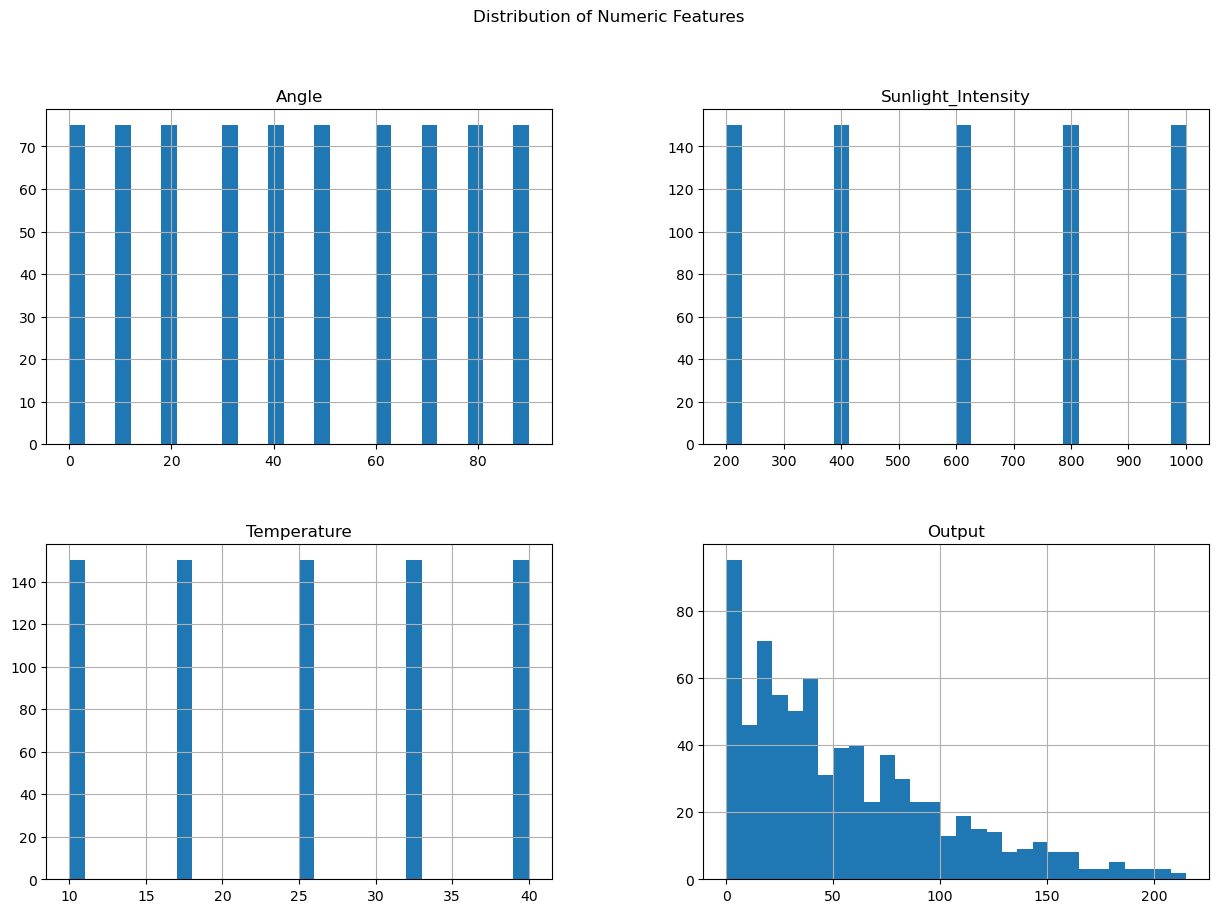

In [40]:
# Distribution of numeric features
numeric_features = ['Angle', 'Sunlight_Intensity', 'Temperature', 'Output']
df[numeric_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

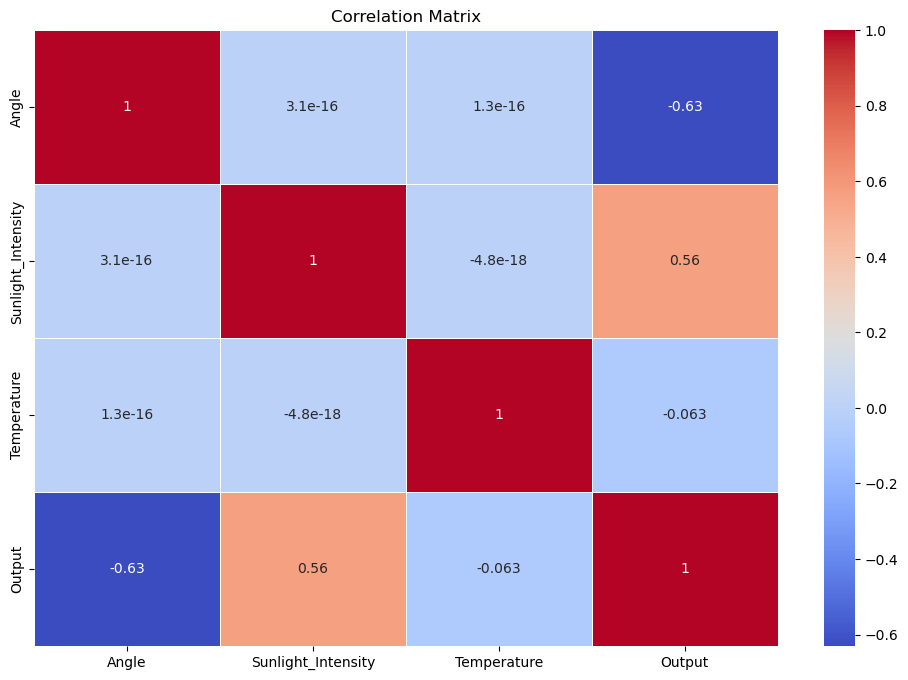

In [42]:
# Correlation matrix
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/Users/jin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


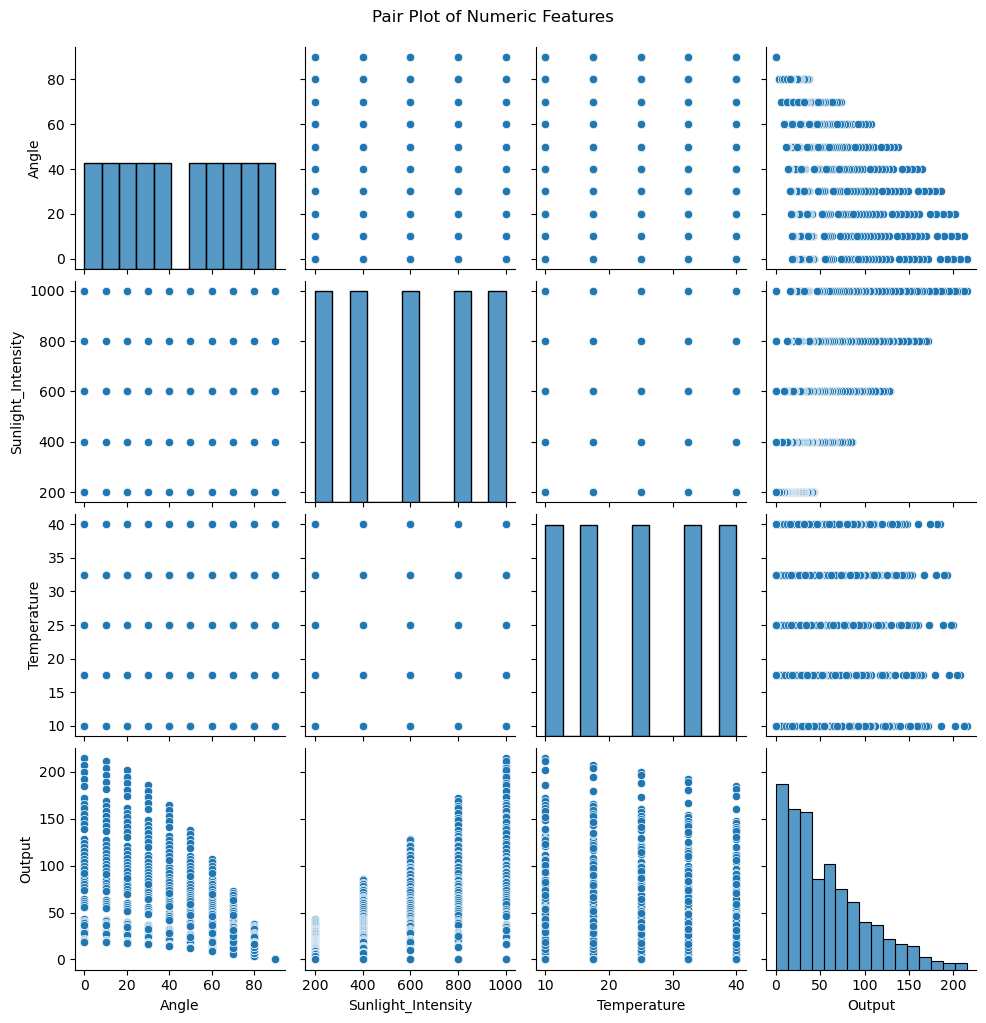

In [43]:
# Pair plot to explore feature interactions
sns.pairplot(df[numeric_features])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

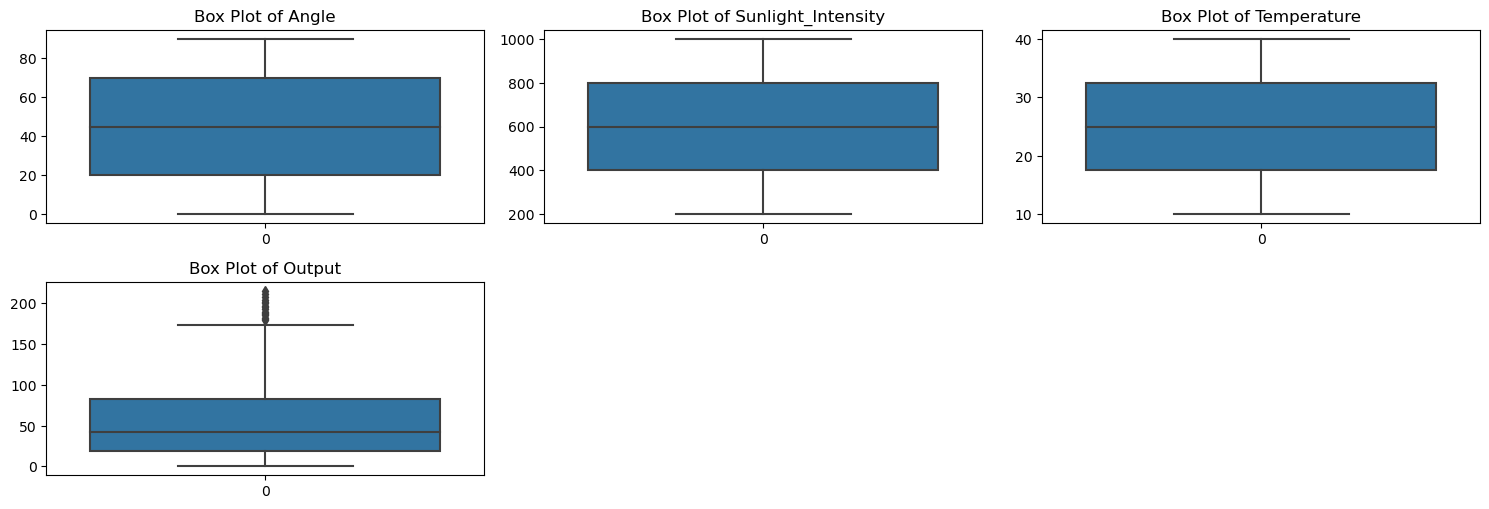

In [44]:
# Box plots to identify outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

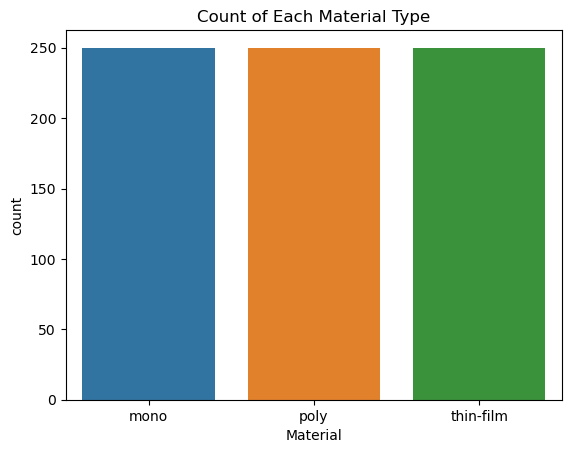

In [45]:
# Bar plots for categorical features (e.g., Material)
sns.countplot(data=df, x='Material')
plt.title('Count of Each Material Type')
plt.show()

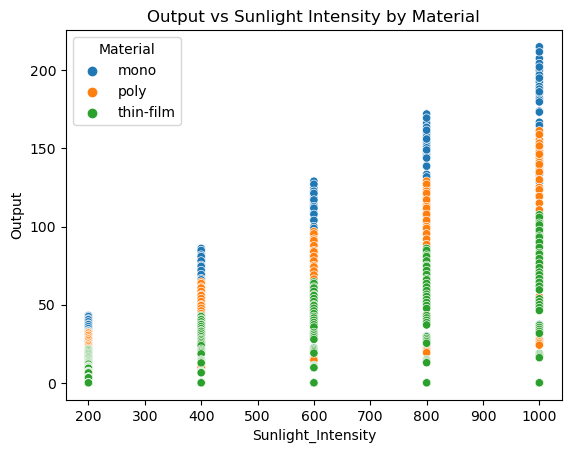

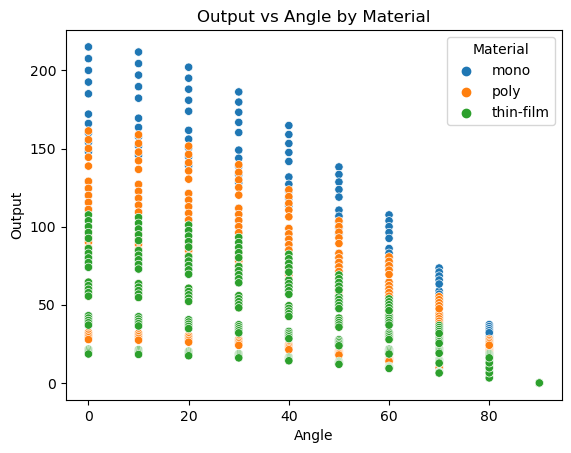

In [46]:
# Scatter plots for specific interactions
sns.scatterplot(data=df, x='Sunlight_Intensity', y='Output', hue='Material')
plt.title('Output vs Sunlight Intensity by Material')
plt.show()

sns.scatterplot(data=df, x='Angle', y='Output', hue='Material')
plt.title('Output vs Angle by Material')
plt.show()

In [4]:
#Create a dataframe from the output
df = pd.DataFrame(data, columns=['Material', 'Angle', 'Sunlight_Intensity', 'Temperature', 'Output'])
df = pd.get_dummies(df, columns=['Material'])

In [5]:
X = df.drop('Output', axis=1)
y = df['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.100977222235827


In [9]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
print("Feature importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance}")

Feature importances:
Angle: 0.43314062290530453
Sunlight_Intensity: 0.40847824100551455
Temperature: 0.006275327390623422
Material_mono: 0.05512629087419488
Material_poly: 0.016864147017301472
Material_thin-film: 0.08011537080706123


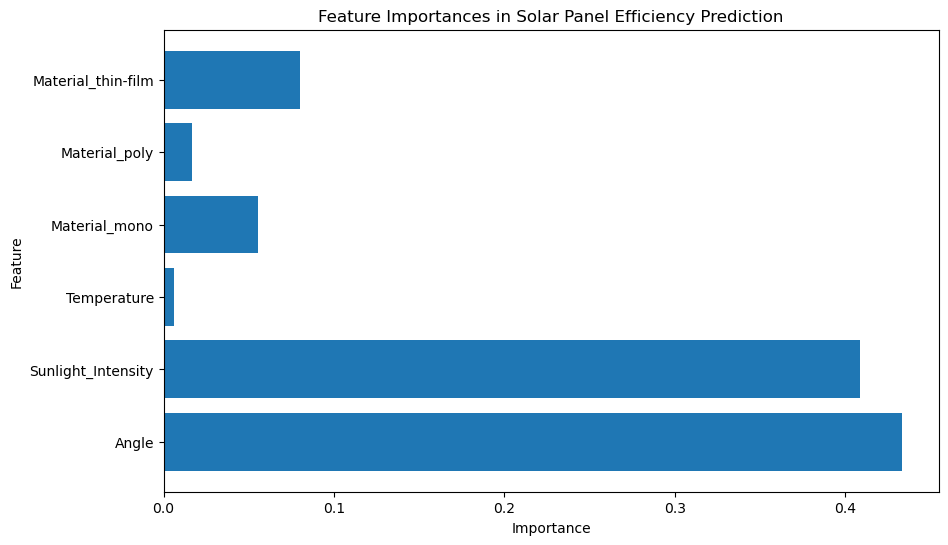

In [13]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Solar Panel Efficiency Prediction')
plt.show()

In [15]:
#Time for some hyperparameter tuning

#Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [16]:
rf_model = RandomForestRegressor(random_state = 42)

In [17]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [19]:
# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:
# Predict and evaluate
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error after tuning: {mse}')

Mean Squared Error after tuning: 6.100977222235827
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, 

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimato

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estima

In [25]:
#Try with Random search
param_dist = {
    'n_estimators': sp_randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11)
}

In [27]:
#initialize the model
rf_model2 = RandomForestRegressor(random_state=42)

In [29]:
#Do the random search
random_search = RandomizedSearchCV(estimator=rf_model2, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30cbd7910>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30cbd65d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30cbd69d0>},
                   random_state=42)

In [30]:
# Best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 164}


In [31]:
# Predict and evaluate
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error after tuning: {mse}')

Mean Squared Error after tuning: 6.306078236616533
